28/2/2022 Kaushal here.

First : Pip install pyefd.

Second: The code below that gives fourier descriptors which are scale and rotation invariant according to the pyefd repo. After trying different images offline, the output i got was len(coeffs) is the number of strokes in the image which are actually figured out by the cv2findContours function and each coeff shape is 10x4 array where 10 represents the order of the fourier itself and 4 represents the coeffecients a,b,c,d. Higher the order higher is the accuracy in terms of representing the contours. Please do check out this link if have not:- https://pyefd.readthedocs.io/en/latest/#first

Change the image directory and link it to the google drive and have fun experimenting with different binary images. If you have any doubt feel free to contact. Other way to get fft would be to use numpy i guess since its the closest for getting what we want.

In [1]:
!pip install pyefd
import pyefd
import cv2
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
im = cv2.imread("/Unsaved Image 5.png")
print(im.dtype)
im_gry = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# print(im_gry.shape)
# im_gry = cv2.bitwise_not(im_gry)
ret, im_thresh = cv2.threshold(im_gry, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# number_of_points = len(contours[0])
# print(number_of_points)
# contours[0] = contours[0][:number_of_points]
print(contours)
for k, contour in enumerate(contours):
  print(len(contour))

# theta = np.radians(340)
# c, s = np.round(np.cos(theta)), np.round(np.sin(theta))
# R = np.array(((c, -s), (s, c)))
# trans = np.array((0, 0))
# contoursR = [np.expand_dims(np.transpose(np.dot(R, np.transpose(np.squeeze(contours[0])))) + trans, 1).astype(np.int32)]
# number_of_pointsR = len(contoursR[0])

# contoursR = [[contours[0][(i + 2) % number_of_points] for i in range(number_of_points)]]
# contoursR = [[contours[0][i - 10] for i in range(number_of_points)]]
# print(len(contours[0]))
# print(len(contoursR[0]))

# print((len(contours[0])))
# contours = [contours[0][:99]]

# im2 = cv2.imread("/img_1_r.jpg")
# im2_gry = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
# ret, im2_thresh = cv2.threshold(im2_gry, 127, 255, cv2.THRESH_BINARY)
# contours2, hierarchy2 = cv2.findContours(im2_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# locus = pyefd.calculate_dc_coefficients(np.squeeze(contours[0]))
coeffs = pyefd.elliptic_fourier_descriptors(np.squeeze(contours[0]), order=5, normalize=False)
# print(pyefd.elliptic_fourier_descriptors(np.squeeze(contours[0]), order=10, normalize=True))
# reconstruction = np.round(pyefd.reconstruct_contour(coeffs, locus, number_of_points)).astype(np.int32)

# locusR = pyefd.calculate_dc_coefficients(np.squeeze(contoursR[0]))
# coeffsR = pyefd.elliptic_fourier_descriptors(np.squeeze(contoursR[0]), order=5, normalize=False)
# print(pyefd.elliptic_fourier_descriptors(np.squeeze(contoursR[0]), order=10, normalize=True))
# reconstructionR = pyefd.reconstruct_contour(coeffsR, locusR, number_of_pointsR)

print(coeffs)
# print(coeffsR)

# theta_1 = 0.5 * np.arctan2(
#         2 * ((coeffs[0, 0] * coeffs[0, 1]) + (coeffs[0, 2] * coeffs[0, 3])),
#         (
#             (coeffs[0, 0] ** 2)
#             - (coeffs[0, 1] ** 2)
#             + (coeffs[0, 2] ** 2)
#             - (coeffs[0, 3] ** 2)
#         ),
#     )

# # theta_1 += np.pi

# # Rotate all coefficients by theta.
# for n in range(1, coeffs.shape[0] + 1):
#     coeffs[n - 1, :] = np.dot(
#         np.array(
#             [
#                 [coeffs[n - 1, 0], coeffs[n - 1, 1]],
#                 [coeffs[n - 1, 2], coeffs[n - 1, 3]],
#             ]
#         ),
#         np.array(
#             [
#                 [np.cos(n * theta_1), -np.sin(n * theta_1)],
#                 [np.sin(n * theta_1), np.cos(n * theta_1)],
#             ]
#         ),
#     ).flatten()

# theta_2 = 0.5 * np.arctan2(
#         2 * ((coeffsR[0, 0] * coeffsR[0, 1]) + (coeffsR[0, 2] * coeffsR[0, 3])),
#         (
#             (coeffsR[0, 0] ** 2)
#             - (coeffsR[0, 1] ** 2)
#             + (coeffsR[0, 2] ** 2)
#             - (coeffsR[0, 3] ** 2)
#         ),
#     )

# # theta_2 += np.pi

# # Rotate all coefficients by theta.
# for n in range(1, coeffsR.shape[0] + 1):
#     coeffsR[n - 1, :] = np.dot(
#         np.array(
#             [
#                 [coeffsR[n - 1, 0], coeffsR[n - 1, 1]],
#                 [coeffsR[n - 1, 2], coeffsR[n - 1, 3]],
#             ]
#         ),
#         np.array(
#             [
#                 [np.cos(n * theta_2), -np.sin(n * theta_2)],
#                 [np.sin(n * theta_2), np.cos(n * theta_2)],
#             ]
#         ),
#     ).flatten()

# print(np.degrees(theta_1))
# print(np.degrees(theta_2))

# print(coeffs)
# print(coeffsR)

# theta = np.radians(-90)
# c, s = np.round(np.cos(theta)), np.round(np.sin(theta))
# R = np.array(((c, -s), (s, c)))
# trans = np.array((0, 0))
# reconstructionR = np.round(np.transpose(np.dot(R, np.transpose(reconstructionR))) + trans).astype(np.int32)

# # This commented code is for viewing the original and the contour images side by side
# cv2_imshow(im)
# im_thresh_bgr = cv2.cvtColor(im_thresh, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(im_thresh_bgr, contours, -1, (0, 0, 255), 1, hierarchy=hierarchy)
# cv2.drawContours(im, [reconstructionR], -1, (0, 0, 255), 1, hierarchy=hierarchy)
# # cv2_imshow(im_thresh)
# cv2_imshow(im_thresh_bgr)
# im_thresh_bgr = cv2.cvtColor(im_thresh, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(im_thresh_bgr, [reconstruction], -1, (0, 255, 0), 1, hierarchy=hierarchy)
# cv2_imshow(im_thresh_bgr)
# cv2.drawContours(im2, contours2, -1, (0, 0, 255), 1, hierarchy=hierarchy2)
# cv2_imshow(im2_thresh)
# cv2_imshow(im2)

# imR = cv2.imread("/img_1_r.jpg")
# cv2.drawContours(imR, contoursR, -1, (0, 255, 0), 1, hierarchy=hierarchy2)
# cv2_imshow(imR)

# print(np.squeeze(contours[0]))
# print(np.squeeze(contours2[0]))
# print(np.squeeze(contoursR[0]))
# coeffs_norm = pyefd.elliptic_fourier_descriptors(np.squeeze(contours[0]), order=100, normalize=True)
# print(coeffs_norm)
# coeffs_norm100 = pyefd.elliptic_fourier_descriptors(np.squeeze(contours[0]), order=100, normalize=True)
# print(coeffs_norm100)
# coeffs2_norm = pyefd.normalize_efd(elliptic_fourier_descriptors(np.squeeze(contours2[0]), order=10, normalize=False), size_invariant=True)
# print(coeffs2_norm)
# coeffsR_norm = pyefd.elliptic_fourier_descriptors(np.squeeze(contoursR[0]), order=100, normalize=True)
# print(coeffsR_norm)

uint8
()


IndexError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
im = cv2.imread("./img_1_r.jpg")
im_gry = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, im_thresh = cv2.threshold(im_gry, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# This commented code is for viewing the original and the contour images side by side
cv2_imshow(im)
cv2.drawContours(im, contours, -1, (0, 255, 0), 1, hierarchy=hierarchy)
cv2_imshow(im_thresh)
cv2_imshow(im)

coeffs = elliptic_fourier_descriptors(np.squeeze(contours[0]), order=10, normalize=False)
print(coeffs)
coeffs = normalize_efd(coeffs, size_invariant=True)
print(coeffs)
coeffs_norm = elliptic_fourier_descriptors(np.squeeze(contours[0]), order=10, normalize=True)
print(coeffs_norm)

NameError: ignored

In [ ]:
im = cv2.imread("/img_2.jpg")
im_gry = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, im_thresh = cv2.threshold(im_gry, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# This commented code is for viewing the original and the contour images side by side
cv2_imshow(im)
cv2.drawContours(im, contours, -1, (0, 255, 0), 1, hierarchy=hierarchy)
cv2_imshow(im_thresh)
cv2_imshow(im)

coeffs = []
for cnt in contours:
    coeffs.append(elliptic_fourier_descriptors(
        np.squeeze(cnt), order=10, normalize=True))
print(coeffs)

[array([[ 1.00000000e+00,  3.86324083e-17,  1.66534527e-17,
        -8.20145677e-01],
       [-5.80471560e-03, -5.89024473e-03,  4.00642078e-02,
        -1.49014496e-02],
       [ 1.29491244e-02,  2.32322888e-02, -2.57180749e-02,
        -4.15128877e-02],
       [-2.72799902e-02, -8.45284772e-03, -6.05573466e-03,
        -9.51001472e-03],
       [-1.25909184e-02,  3.77511785e-03,  6.61382110e-03,
        -1.69407164e-03],
       [-1.46908469e-02, -7.99096066e-03,  6.89776076e-03,
         6.26809506e-03],
       [-8.31064416e-03, -8.12615545e-04, -2.51644628e-03,
        -1.96639978e-03],
       [-2.20553630e-03, -8.32864074e-03,  1.14233693e-03,
         1.52026670e-02],
       [-2.88172698e-03, -2.52674714e-03,  4.58891885e-03,
        -3.16457532e-03],
       [ 3.97285249e-03,  7.45566133e-04, -8.07835188e-03,
        -7.02632282e-03]])]


In [ ]:
im = cv2.imread("/img_2_r.jpg")
im_gry = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, im_thresh = cv2.threshold(im_gry, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# This commented code is for viewing the original and the contour images side by side
cv2_imshow(im)
cv2.drawContours(im, contours, -1, (0, 255, 0), 1, hierarchy=hierarchy)
cv2_imshow(im_thresh)
cv2_imshow(im)

coeffs = []
for cnt in contours:
    coeffs.append(elliptic_fourier_descriptors(
        np.squeeze(cnt), order=10, normalize=True))
print(coeffs)

[array([[ 1.00000000e+00,  1.02047311e-16,  1.05488345e-16,
        -7.90148467e-01],
       [ 1.05545676e-02,  7.62863871e-03, -2.90582618e-02,
         3.87788026e-03],
       [ 1.12371432e-02,  2.01660277e-02, -2.32604773e-02,
        -5.00331362e-02],
       [ 2.62519959e-02,  1.26977762e-02,  6.32264862e-04,
         1.02707985e-02],
       [-1.13425973e-02,  2.27974268e-03,  7.89485566e-03,
         1.15796800e-03],
       [ 1.36693931e-02,  1.02493085e-02, -5.31592600e-03,
        -7.32025872e-03],
       [-6.98640808e-03, -3.31457661e-03, -4.79111214e-04,
        -1.23178403e-03],
       [ 4.28372147e-04,  7.45702352e-03,  5.36841315e-03,
        -1.48252393e-02],
       [-9.48336980e-04, -2.82838884e-03,  7.39658171e-03,
        -3.37989257e-03],
       [-1.34105733e-03, -1.01776674e-03,  4.67072752e-03,
         7.12885772e-03]])]


In [ ]:
from google.colab.patches import cv2_imshow

image=cv2.imread("/kindpng_4947459_r.png")
im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# This commented code is for viewing the original and the contour images side by side
result=cv2.drawContours(image, contours, -1, (255, 0, 0),2,hierarchy = hierarchy)
image = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
test= np.concatenate((result,image), axis=1)
window_name = 'image'
cv2_imshow(test)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

coeffs = []
for cnt in contours:
    coeffs.append(elliptic_fourier_descriptors(
        np.squeeze(cnt), order=10, normalize=True))
print(coeffs)

error: ignored

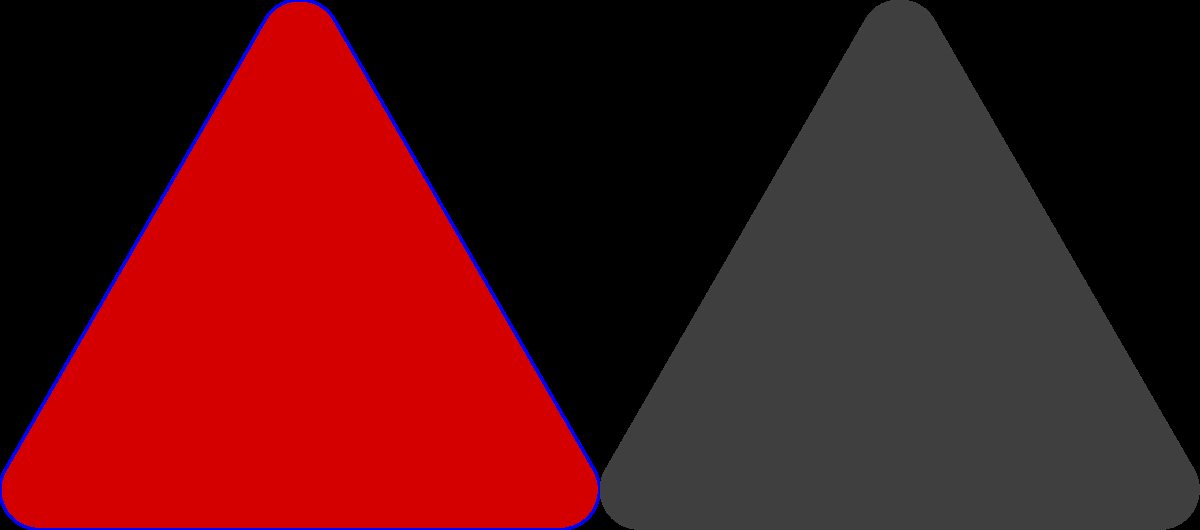

[array([[ 1.00000000e+00,  3.82329797e-17,  3.82748313e-17,
        -9.95271330e-01],
       [ 1.95065676e-01, -4.84380224e-03,  5.27271187e-03,
         2.31072995e-01],
       [ 3.17889827e-03,  5.17589679e-06, -1.78613000e-04,
        -1.02980337e-02],
       [ 7.24567206e-02, -1.82071982e-03, -1.42640194e-03,
        -6.33098715e-02],
       [ 2.12902209e-02, -1.03269007e-03,  1.48164767e-03,
         3.20943804e-02],
       [ 3.00254804e-03, -1.08806967e-04, -1.58602255e-04,
        -4.77428775e-03],
       [ 2.52192105e-02, -1.27155406e-03, -8.95397796e-04,
        -2.00358834e-02],
       [ 4.55789664e-03, -3.08113945e-04,  7.03933082e-04,
         9.97426252e-03],
       [ 2.72347925e-03, -1.80041715e-04, -1.34638058e-04,
        -2.80354680e-03],
       [ 1.22038366e-02, -9.27518415e-04, -6.09078798e-04,
        -9.11238217e-03]])]


In [ ]:
image=cv2.imread("/kindpng_4947459_s.png")
im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(im,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# This commented code is for viewing the original and the contour images side by side
result=cv2.drawContours(image, contours, -1, (255, 0, 0),2,hierarchy = hierarchy)
image = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
test= np.concatenate((result,image), axis=1)
window_name = 'image'
cv2_imshow(test)
cv2.waitKey(0) 
cv2.destroyAllWindows()

coeffs = []
for cnt in contours:
    coeffs.append(elliptic_fourier_descriptors(
        np.squeeze(cnt), order=10, normalize=True))
print(coeffs)

5/3/2022
Kaushal here. Changed the code. I am able to get the same coeffecients for rotation. Have not tested for scaling yet. Do play around with the code and let everyone know if you find something.

In [ ]:
#images to fourier coefficients

import cv2,numpy as np,matplotlib.pyplot as plt
from pyefd import elliptic_fourier_descriptors,normalize_efd

image=cv2.imread("C:\\Users\\skyvi\\Desktop\\class work\\perception in robotics\\Project\\mnist dataset\\test_images\\0.png")
im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
im=cv2.bitwise_not(im)
contours, hierarchy = cv2.findContours(im,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#Dont forget to change the cv2.imshow to cv2_imshow if using the below display code

coeffs = []
for cnt in contours:
    coeffs.append(normalize_efd(elliptic_fourier_descriptors(np.squeeze(cnt), order=10),size_invariant=True))

print(len(coeffs))
print(coeffs)

error: ignored

5/12/2022 Hassan here: trying to test Kaushal's code to see if the coefficents are same for invariant images 

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving 15.jpg to 15.jpg


In [ ]:
#images to fourier coefficients

import cv2,numpy as np,matplotlib.pyplot as plt
from pyefd import elliptic_fourier_descriptors,normalize_efd

image=cv2.imread('15.jpg')
im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
im=cv2.bitwise_not(im)
contours, hierarchy = cv2.findContours(im,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

'''
result=cv2.drawContours(im, contours, -1, (0,0,255),2,hierarchy = hierarchy)
plt.imshow(result)
plt.show()
'''
#Dont forget to change the cv2.imshow to cv2_imshow if using the below display code
'''
window_name = 'image'
result=cv2.drawContours(im, contours, -1, (0,0,255),2,hierarchy = hierarchy)
cv2.imshow(window_name, result)
cv2.waitKey(0) 
'''

coeffs = []
for cnt in contours:
    coeffs.append(normalize_efd(elliptic_fourier_descriptors(np.squeeze(cnt), order=10),size_invariant=True))

print(len(coeffs))
print(coeffs)

7
[array([[ 1.00000000e+00, -6.93267878e-18, -1.20077519e-17,
        -5.77350269e-01],
       [ 2.50000000e-01, -8.23519513e-17,  1.17361216e-16,
         1.44337567e-01],
       [-8.40198635e-49,  3.28486858e-33,  2.32028352e-33,
        -9.07145777e-18],
       [ 6.25000000e-02, -2.37675373e-17, -2.62153437e-17,
        -3.60843918e-02],
       [ 4.00000000e-02, -3.55117158e-17,  5.13585755e-17,
         2.30940108e-02],
       [-8.40198635e-49,  1.64243429e-33,  2.32028352e-33,
        -4.53572889e-18],
       [ 2.04081633e-02, -9.33814371e-18, -1.00778845e-17,
        -1.17826586e-02],
       [ 1.56250000e-02, -1.56576371e-17,  2.09348674e-17,
         9.02109796e-03],
       [ 2.49628067e-49, -3.25318070e-34,  2.32028352e-33,
        -3.02381926e-18],
       [ 1.00000000e-02, -1.46004334e-17, -2.12249942e-17,
        -5.77350269e-03]]), array([[ 1.00000000e+00, -1.65741681e-16,  1.72922749e-16,
         5.77350269e-01],
       [ 2.50000000e-01, -3.20469505e-17, -5.17741718e-17,
 